# Load the data

In [1]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np
gdf = gpd.read_file('/content/traffic_gdf_6month.gpkg')



# Data Preprocessing

In [2]:

gdf['time_series'] = pd.to_datetime(gdf['time_series'])


sampled_gdf = gdf[
    (gdf['time_series'].dt.month.between(1, 6)) &
    (gdf['time_series'].dt.year == 2023)
]

gdf = sampled_gdf

In [3]:
gdf

,traffic_id,time_series,street_name,weather,number_of_cars,average_car_speed,traffic_status,day_name,date,geometry
0,0,2023-01-01 06:00:00,طريق جدة,Cloudy,960,71.23,Moderate,Sunday,None,"LINESTRING (46.62054 24.66633, 46.62233 24.667..."
1,1,2023-01-01 06:00:00,طريق جدة,Cloudy,889,51.60,Moderate,Sunday,None,"LINESTRING (46.60117 24.65468, 46.60181 24.655..."
2,2,2023-01-01 06:00:00,طريق جدة,Clear,876,40.54,Moderate,Sunday,None,"LINESTRING (46.59514 24.64852, 46.59604 24.649..."
3,3,2023-01-01 06:00:00,طريق جدة,Rainy,1438,117.15,Light,Sunday,None,"LINESTRING (46.58231 24.6305, 46.58402 24.633,..."
4,4,2023-01-01 06:00:00,مكة المكرمة,Cloudy,1124,45.20,Moderate,Sunday,None,"LINESTRING (46.68323 24.67646, 46.68563 24.6774)"
...,...,...,...,...,...,...,...,...,...,...
946065,946065,2023-06-30 23:00:00,طريق مكة المكرمة,Clear,1178,87.90,Moderate,Friday,None,"LINESTRING (46.75017 24.70737, 46.74751 24.705..."
946066,946066,2023-06-30 23:00:00,طريق مكة المكرمة,Cloudy,1017,66.04,Moderate,Friday,None,"LINESTRING (46.74937 24.70669, 46.75066 24.707..."
946067,946067,2023-06-30 23:00:00,طريق مكة المكرمة,Stormy,1126,54.03,Moderate,Friday,None,"LINESTRING (46.75962 24.71329, 46.75664 24.711..."
946068,946068,2023-06-30 23:00:00,طريق مكة المكرمة,Clear,1395,99.17,Light,Friday,None,"LINESTRING (46.75791 24.71201, 46.75799 24.71205)"


In [4]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import numpy as np
gdf['time_series'] = pd.to_datetime(gdf['time_series'])
gdf['hour'] = gdf['time_series'].dt.hour
gdf['day'] = gdf['time_series'].dt.dayofweek
gdf['month'] = gdf['time_series'].dt.month

gdf['centroid_x'] = gdf.geometry.centroid.x
gdf['centroid_y'] = gdf.geometry.centroid.y

label_encoder = LabelEncoder()
gdf['traffic_status_encoded'] = label_encoder.fit_transform(gdf['traffic_status'])

features = gdf[['hour', 'day', 'month', 'centroid_x', 'centroid_y']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



<ipython-input-4-0b667bee3eb5>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-4-0b667bee3eb5>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


In [5]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(random_state=42)

X = gdf[['hour', 'day', 'month', 'centroid_x', 'centroid_y', 'traffic_status_encoded', 'traffic_id']]  # Features for clustering
y = gdf['traffic_status']

X_resampled, y_resampled = rus.fit_resample(X, y)


balanced_gdf = pd.DataFrame(X_resampled, columns=X.columns)
balanced_gdf['traffic_status'] = y_resampled

rus = RandomUnderSampler(random_state=42)


X_resampled, y_resampled = rus.fit_resample(X, y)


balanced_gdf = pd.DataFrame(X_resampled, columns=X.columns)
balanced_gdf['traffic_status'] = y_resampled

In [6]:
balanced_gdf['traffic_status'].value_counts()

,count
traffic_status,
Heavy,78137
Light,78137
Moderate,78137


In [7]:
balanced_gdf['traffic_status'].value_counts()

,count
traffic_status,
Heavy,78137
Light,78137
Moderate,78137


In [8]:
gdf= balanced_gdf
gdf

,hour,day,month,centroid_x,centroid_y,traffic_status_encoded,traffic_id,traffic_status
499323,10,3,4,46.681508,24.676263,0,499323,Heavy
819338,17,1,6,46.830927,24.757182,0,819338,Heavy
628699,11,0,5,46.678170,24.675632,0,628699,Heavy
270180,13,1,2,46.768357,24.704456,0,270180,Heavy
643342,18,2,5,46.838346,24.762418,0,643342,Heavy
...,...,...,...,...,...,...,...,...
823141,12,2,6,46.864974,24.796017,2,823141,Moderate
111190,9,6,1,46.738063,24.699718,2,111190,Moderate
289850,19,5,2,46.831000,24.757905,2,289850,Moderate
473516,22,5,4,46.676647,24.675509,2,473516,Moderate


# Clustering- Clustering-Based Predictive Approach

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gdf['traffic_status_encoded'] = label_encoder.fit_transform(gdf['traffic_status'])

features = gdf[['hour', 'day', 'month', 'traffic_status_encoded', 'centroid_x', 'centroid_y']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
gdf['cluster'] = kmeans.fit_predict(features_scaled)
print("Cluster centers (in scaled space):")
print(kmeans.cluster_centers_)
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster centers (in original space):")
print(original_centers)


Cluster centers (in scaled space):
[[ 6.14023604e-01  8.34296363e-01 -1.70995689e-04  1.33724514e-01
  -2.94619926e-01 -3.47532056e-01]
 [-5.95585337e-01 -7.93054795e-01 -2.48727713e-03 -1.01073656e-01
  -3.26327407e-01 -3.72510433e-01]
 [ 5.97526793e-02  4.01387328e-02  6.71082881e-03 -5.95963412e-02
   1.52341080e+00  1.76550499e+00]]
Cluster centers (in original space):
[[17.66147242  4.49225657  3.50865944  1.10918561 46.76059186 24.71618174]
 [11.15100218  1.35200437  3.50469339  0.91747371 46.7582341  24.71483588]
 [14.67822368  2.95979368  3.52044282  0.95133979 46.89577975 24.83003444]]


In [18]:
gdf

,hour,day,month,centroid_x,centroid_y,traffic_status_encoded,traffic_id,traffic_status,cluster
499323,10,3,4,46.681508,24.676263,0,499323,Heavy,1
819338,17,1,6,46.830927,24.757182,0,819338,Heavy,1
628699,11,0,5,46.678170,24.675632,0,628699,Heavy,1
270180,13,1,2,46.768357,24.704456,0,270180,Heavy,1
643342,18,2,5,46.838346,24.762418,0,643342,Heavy,2
...,...,...,...,...,...,...,...,...,...
823141,12,2,6,46.864974,24.796017,2,823141,Moderate,2
111190,9,6,1,46.738063,24.699718,2,111190,Moderate,0
289850,19,5,2,46.831000,24.757905,2,289850,Moderate,0
473516,22,5,4,46.676647,24.675509,2,473516,Moderate,0


## Evaluation

In [19]:
print(gdf[['hour', 'day', 'month', 'traffic_status', 'traffic_status_encoded', 'centroid_x', 'centroid_y', 'cluster']].head())

        hour  day  month traffic_status  traffic_status_encoded  centroid_x  \
499323    10    3      4          Heavy                       0   46.681508   
819338    17    1      6          Heavy                       0   46.830927   
628699    11    0      5          Heavy                       0   46.678170   
270180    13    1      2          Heavy                       0   46.768357   
643342    18    2      5          Heavy                       0   46.838346   

        centroid_y  cluster  
499323   24.676263        1  
819338   24.757182        1  
628699   24.675632        1  
270180   24.704456        1  
643342   24.762418        2  


In [20]:
cluster_summary = gdf.groupby(['traffic_status_encoded', 'cluster']).size().reset_index(name='count')
print(cluster_summary)

   traffic_status_encoded  cluster  count
0                       0        0  20696
1                       0        1  43381
2                       0        2  14060
3                       1        0  42312
4                       1        1  22222
5                       1        2  13603
6                       2        0  31083
7                       2        1  34920
8                       2        2  12134


## Visualize Clusters

In [21]:
pip install matplotlib seaborn

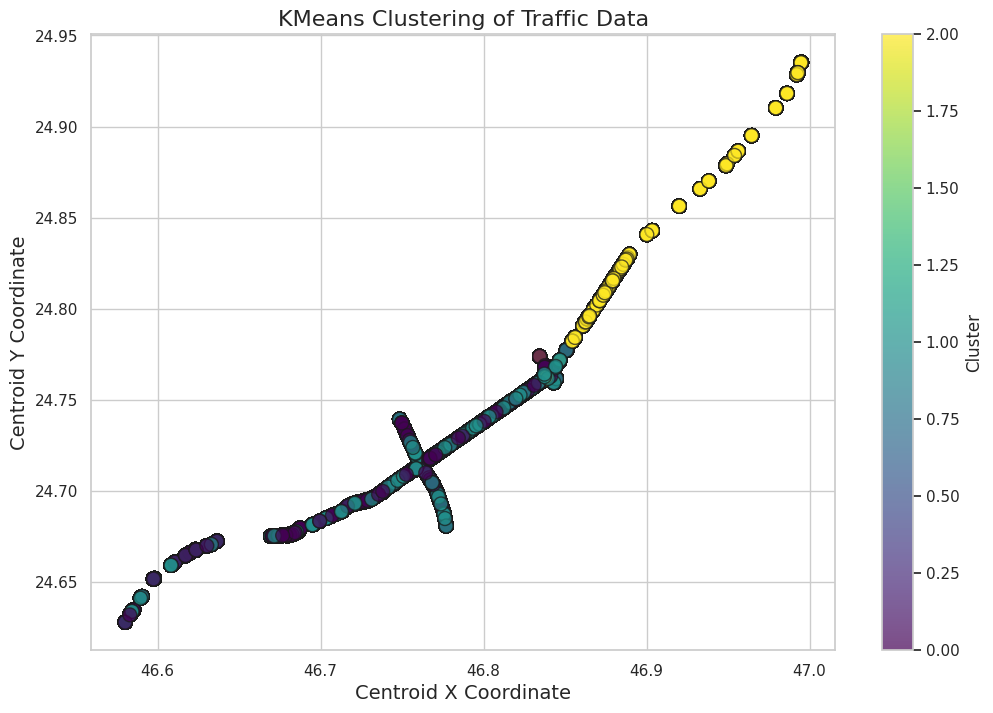

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    gdf['centroid_x'],
    gdf['centroid_y'],
    c=gdf['cluster'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='k',
    s=100
)


plt.colorbar(scatter, label='Cluster')


plt.title('KMeans Clustering of Traffic Data', fontsize=16)
plt.xlabel('Centroid X Coordinate', fontsize=14)
plt.ylabel('Centroid Y Coordinate', fontsize=14)


plt.show()


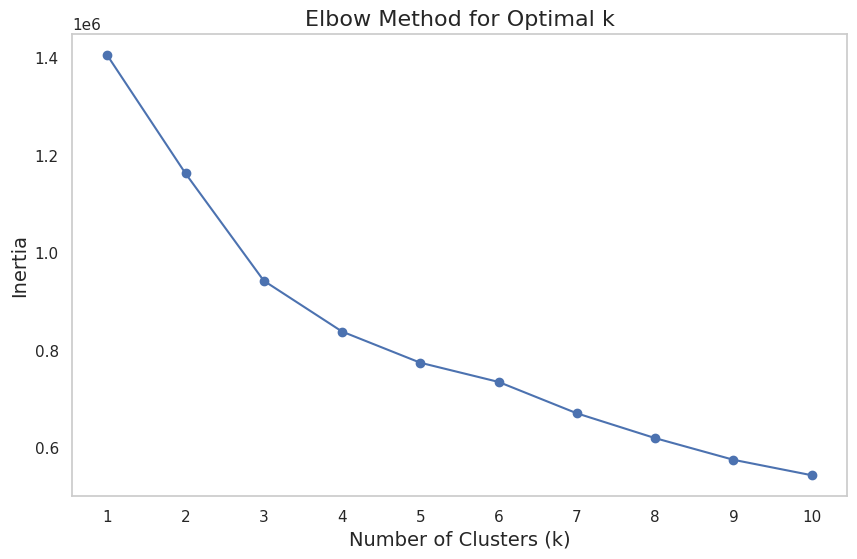

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cluster_range = range(1, 11)
inertia = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.xticks(cluster_range)
plt.grid()
plt.show()


# Cluster Predection

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gdf['traffic_status_encoded'] = label_encoder.fit_transform(gdf['traffic_status'])


features = gdf[['hour', 'day', 'month', 'centroid_x', 'centroid_y']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
gdf['cluster'] = kmeans.fit_predict(features_scaled)

def predict_traffic_status(hour, day, month, centroid_x, centroid_y):

    new_data = pd.DataFrame({
        'hour': [hour],
        'day': [day],
        'month': [month],
        'centroid_x': [centroid_x],
        'centroid_y': [centroid_y]
    })


    new_data_scaled = scaler.transform(new_data)

    cluster = kmeans.predict(new_data_scaled)[0]


    most_common_status = gdf[gdf['cluster'] == cluster]['traffic_status'].mode()[0]

    return most_common_status

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gdf['traffic_status_encoded'] = label_encoder.fit_transform(gdf['traffic_status'])

features = gdf[['hour', 'day', 'month', 'centroid_x', 'centroid_y']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
gdf['cluster'] = kmeans.fit_predict(features_scaled)

def predict_traffic_status(hour, day, month, centroid_x, centroid_y):

    new_data = pd.DataFrame({
        'hour': [hour],
        'day': [day],
        'month': [month],
        'centroid_x': [centroid_x],
        'centroid_y': [centroid_y]
    })


    new_data_scaled = scaler.transform(new_data)

    cluster = kmeans.predict(new_data_scaled)[0]


    most_common_status = gdf[gdf['cluster'] == cluster]['traffic_status'].mode()[0]

    return most_common_status


predicted_status = predict_traffic_status(hour=18, day=5, month=3, centroid_x=46.783493, centroid_y=24.727720)
print(f'The predicted traffic status is: {predicted_status}')



The predicted traffic status is: Light
